In [1]:
import os
import time

import numpy as np
from PIL import Image
import tensorflow as tf

import matplotlib.pyplot as plt

In [2]:
MODEL_FILE = 'models/tflite/wdsr.tflite'
IMAGE_FILE = 'demo/0829x4-crop.png'

In [3]:
interpreter = tf.lite.Interpreter(MODEL_FILE)
input_details = interpreter.get_input_details()
output_details = interpreter.get_output_details()

float_model = input_details[0]['dtype'] == np.float32

img = Image.open(IMAGE_FILE)

In [4]:
# input NHWC, resize h and w of input tensor 
input_details[0]['shape'][1] = img.height 
input_details[0]['shape'][2] = img.width

interpreter.resize_tensor_input(0, input_details[0]['shape'])
interpreter.allocate_tensors()

# add N dim to input image (H, W, C)
input_data = np.expand_dims(img, axis=0)
if float_model:
    input_data = (np.float32(input_data / 255.0))
    
interpreter.set_tensor(input_details[0]['index'], input_data)

start_time = time.time()
interpreter.invoke()
stop_time = time.time()
print("time: ", stop_time - start_time)

output_data = interpreter.get_tensor(output_details[0]['index'])
results = np.squeeze(output_data)
results_img = Image.fromarray(np.uint8(results * 255.0))

time:  0.1806800365447998


In [5]:
def plot_sample(lr, sr):
    plt.figure(figsize=(20, 10))

    images = [lr, sr]
    titles = ['LR', 'SR']

    for i, (img, title) in enumerate(zip(images, titles)):
        plt.subplot(1, 2, i+1)
        plt.imshow(img)
        plt.title(title)
        plt.xticks([])
        plt.yticks([])

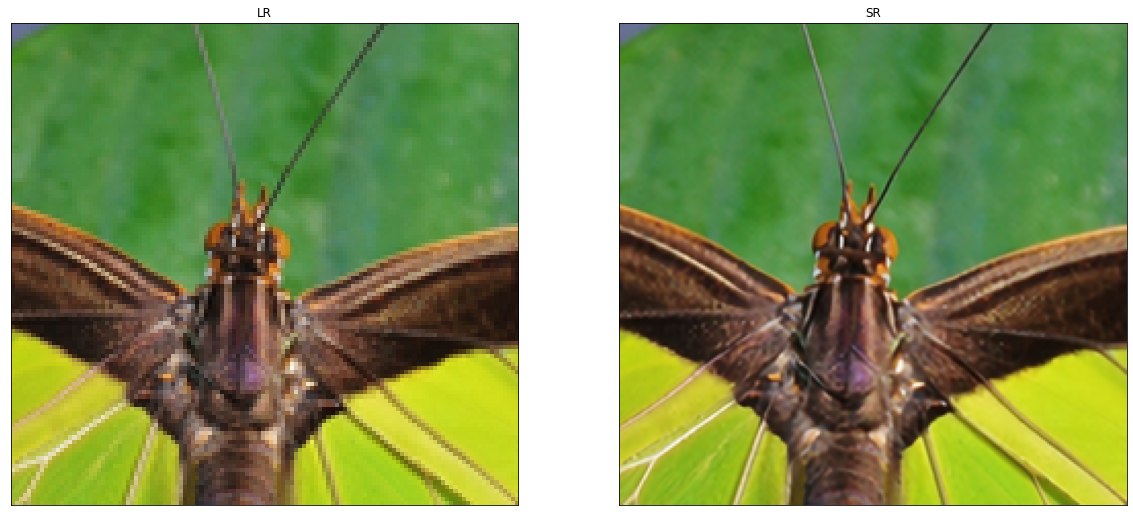

In [6]:
plot_sample(img, results_img)

In [7]:
MODEL_FILE = 'models/tflite_quant/wdsr_quant.tflite'

In [13]:
interpreter = tf.lite.Interpreter(MODEL_FILE)
input_details = interpreter.get_input_details()
output_details = interpreter.get_output_details()

float_model = input_details[0]['dtype'] == np.float32

img = Image.open(IMAGE_FILE)

# input NHWC, resize h and w of input tensor 
input_details[0]['shape'][1] = img.height 
input_details[0]['shape'][2] = img.width

interpreter.resize_tensor_input(0, input_details[0]['shape'])
interpreter.allocate_tensors()

# add N dim to input image (H, W, C)
input_data = np.expand_dims(img, axis=0)
if float_model:
    input_data = (np.float32(input_data))
    
interpreter.set_tensor(input_details[0]['index'], input_data)

start_time = time.time()
interpreter.invoke()
stop_time = time.time()
print("time: ", stop_time - start_time)

output_data = interpreter.get_tensor(output_details[0]['index'])
results = np.squeeze(output_data)
(q_scale, q_zero) = output_details[0]['quantization']
results_img = Image.fromarray(np.uint8(results))

time:  0.44454383850097656


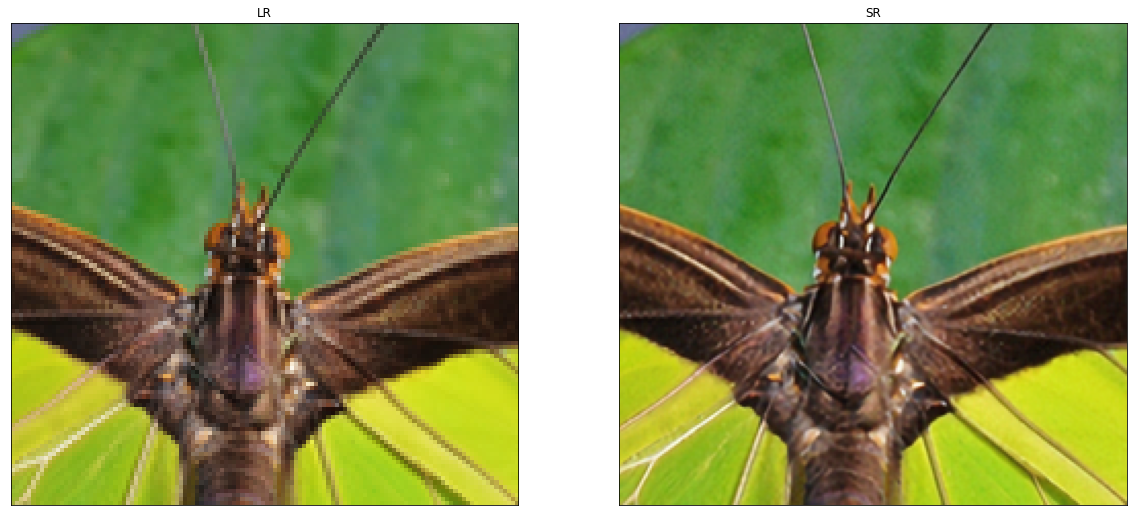

In [14]:
plot_sample(img, results_img)